# １．気象庁データの取得

## １−１． Google Colaboratory 立ち上げ時

※ wget については、[ここ](https://robo.mydns.jp/Lecture/?%B9%D6%B5%C1%A4%CE%A5%DA%A1%BC%A5%B8/Python%A4%CE%A4%AA%CA%D9%B6%AF/RadarData#p3d1cd0f)を参照して、予め導入しておく

In [1]:
import os
import requests
import glob
import subprocess

%cd C:/Users/mori/Documents/PythonData/

def getMSMfcstData(yyyymmdd,ini=0): #ini は、与えるならば、0, 3, 6, ... 21 と３時間おき。与えなければ、0 となる。
    date  = str(yyyymmdd)
    initime = str(ini).zfill(2)

    fname = f"Z__C_RJTD_{date}{initime}0000_MSM_GPV_Rjp_L-pall_FH00-15_grib2.bin"
    url   = f"http://database.rish.kyoto-u.ac.jp/arch/jmadata/data/gpv/original/{date[0:4]}/{date[4:6]}/{date[6:8]}/{fname}"

    if not os.path.exists(f"./{fname}"):
        response = requests.get(url)
        if response.status_code == 200:
            # ファイルを書き込み
            with open(f"./{fname}", 'wb') as file:
                file.write(response.content)
            print(f"{fname} has been downloaded.")
        else:
            print("Failed to download the file.")
    else:
        print(f"{fname} already exists.")

    bin_files = glob.glob(os.path.join('.', '*.bin'))
 
    for bin_file in bin_files:
        # 同じ名前の *.ncdf ファイル名を生成
        ncdf_file = bin_file.replace('.bin', '.ncdf')
        #
        # *.ncdf ファイルが存在するかチェック
        if not os.path.exists(ncdf_file):
            print(f"Converting {bin_file} to {ncdf_file}")
            # コマンドを実行 (例: wgrib2 file.bin -netcdf file.ncdf)
            command = f"wgrib2 {bin_file} -netcdf {ncdf_file}"
            subprocess.run(command, shell=True)
        else:
            print(f"{ncdf_file} already exists.")

C:\Users\mori\Documents\PythonData


## １−２． データのダウンロードと、netcdf への変換


In [2]:
for day in range(20230701,20230705): # 4日まで
    for hour in range(0,22,3): # 21時まで
        getMSMfcstData(day,hour)

Z__C_RJTD_20230701000000_MSM_GPV_Rjp_L-pall_FH00-15_grib2.bin already exists.
.\Z__C_RJTD_20230701000000_MSM_GPV_Rjp_L-pall_FH00-15_grib2.ncdf already exists.
.\Z__C_RJTD_20230701000000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.ncdf already exists.
.\Z__C_RJTD_20230701000000_RDR_JMAGPV_Gll2p5km_Phhlv_ANAL_grib2.ncdf already exists.
.\Z__C_RJTD_20230701001000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.ncdf already exists.
.\Z__C_RJTD_20230701001000_RDR_JMAGPV_Gll2p5km_Phhlv_ANAL_grib2.ncdf already exists.
.\Z__C_RJTD_20230701002000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.ncdf already exists.
.\Z__C_RJTD_20230701002000_RDR_JMAGPV_Gll2p5km_Phhlv_ANAL_grib2.ncdf already exists.
.\Z__C_RJTD_20230701003000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.ncdf already exists.
.\Z__C_RJTD_20230701003000_RDR_JMAGPV_Gll2p5km_Phhlv_ANAL_grib2.ncdf already exists.
.\Z__C_RJTD_20230701004000_RDR_JMAGPV_Ggis1km_Prr10lv_ANAL_grib2.ncdf already exists.
.\Z__C_RJTD_20230701004000_RDR_JMAGPV_Gll2p5km_Phhlv_ANAL_grib2.ncdf al

In [9]:
import xarray as xr

# NetCDFファイルを開く
data = xr.open_dataset('C:/Users/mori/Documents/PythonData/Z__C_RJTD_20230704150000_MSM_GPV_Rjp_L-pall_FH00-15_grib2.ncdf',engine="netcdf4")

# データセットの内容を表示
print(data)

<xarray.Dataset>
Dimensions:      (latitude: 253, longitude: 241, time: 6)
Coordinates:
  * latitude     (latitude) float64 22.4 22.5 22.6 22.7 ... 47.3 47.4 47.5 47.6
  * longitude    (longitude) float64 120.0 120.1 120.2 ... 149.8 149.9 150.0
  * time         (time) datetime64[ns] 2023-07-04T15:00:00 ... 2023-07-05T06:...
Data variables: (12/92)
    HGT_1000mb   (time, latitude, longitude) float32 ...
    UGRD_1000mb  (time, latitude, longitude) float32 ...
    VGRD_1000mb  (time, latitude, longitude) float32 ...
    TMP_1000mb   (time, latitude, longitude) float32 ...
    VVEL_1000mb  (time, latitude, longitude) float32 ...
    RH_1000mb    (time, latitude, longitude) float32 ...
    ...           ...
    VVEL_150mb   (time, latitude, longitude) float32 ...
    HGT_100mb    (time, latitude, longitude) float32 ...
    UGRD_100mb   (time, latitude, longitude) float32 ...
    VGRD_100mb   (time, latitude, longitude) float32 ...
    TMP_100mb    (time, latitude, longitude) float32 ...
 

# ２． 描画


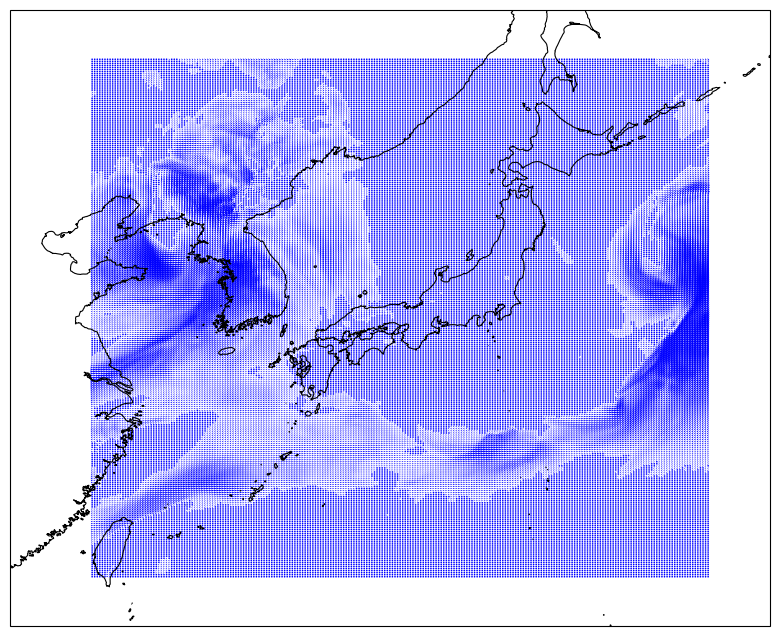

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units

# データファイルを読み込む
data = xr.open_dataset('C:/Users/mori/Documents/PythonData/Z__C_RJTD_20230704150000_MSM_GPV_Rjp_L-pall_FH00-15_grib2.ncdf')

# 特定のレベル（例: 850hPa）のU成分（東西風）とV成分（南北風）を抽出
# lat_min, lat_max = 29, 35  # 緯度の範囲
# lon_min, lon_max = 126, 133  # 経度の範囲
lat_min, lat_max = 20, 50  # 緯度の範囲
lon_min, lon_max = 116, 153  # 経度の範囲
u_wind = data['UGRD_850mb'].sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max)).metpy.quantify()
v_wind = data['VGRD_850mb'].sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max)).metpy.quantify()

# 緯度と経度のデータをスライス
lons = data['longitude'].sel(longitude=slice(lon_min, lon_max))
lats = data['latitude'].sel(latitude=slice(lat_min, lat_max))

# プロットの設定
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
# 高解像度の海岸線を描画
ax.coastlines(resolution='10m', linewidth=0.8)

# 風のベクトル図をプロット
ax.quiver(lons, lats, u_wind[0,:,:], v_wind[0,:,:], pivot='middle', color='blue')

plt.show()

del data


Forecast hour index: 0


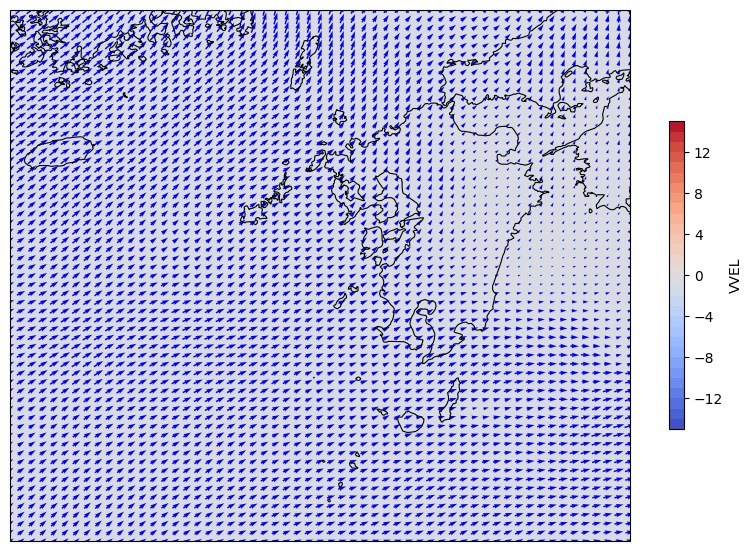

Forecast hour index: 1


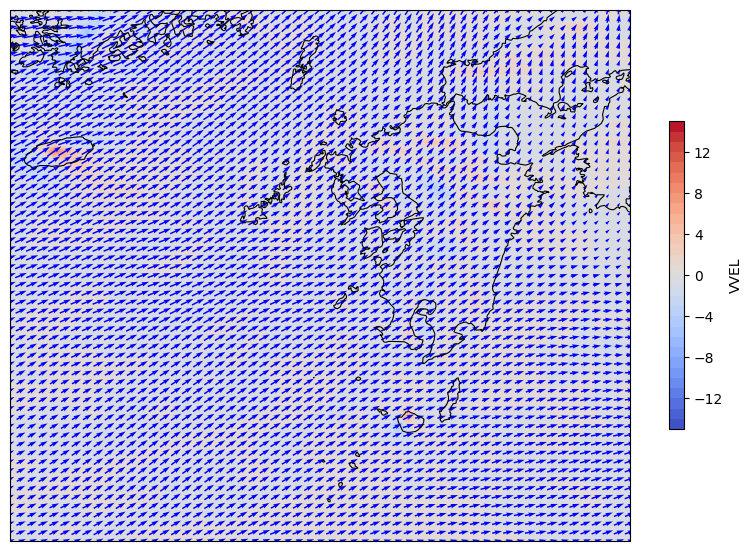

Forecast hour index: 2


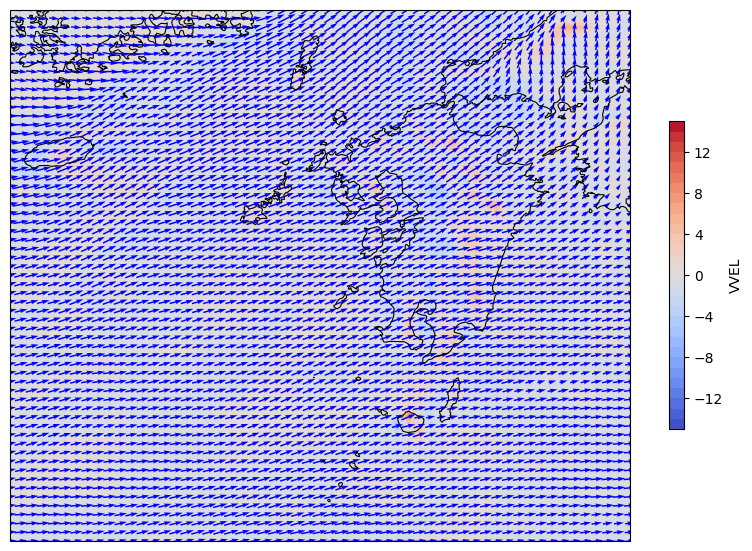

Forecast hour index: 3


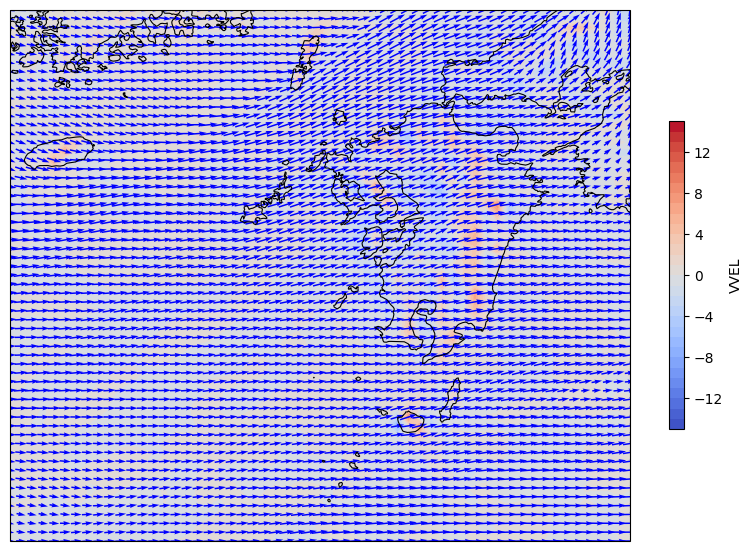

Forecast hour index: 4


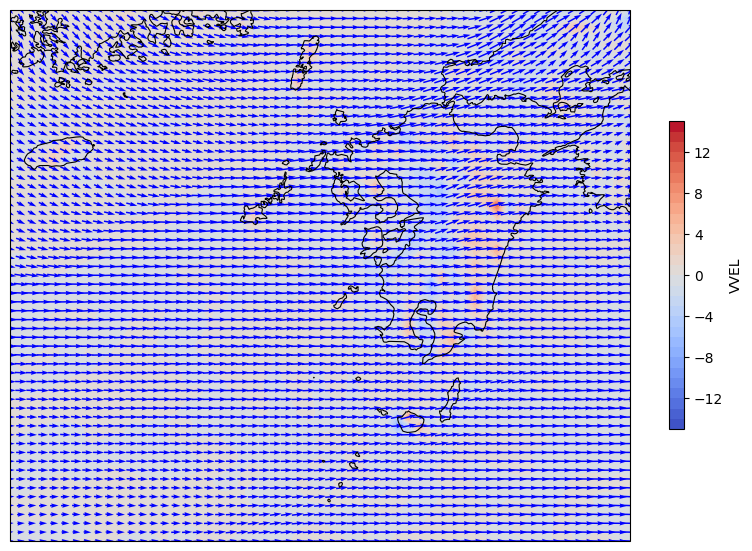

Forecast hour index: 5


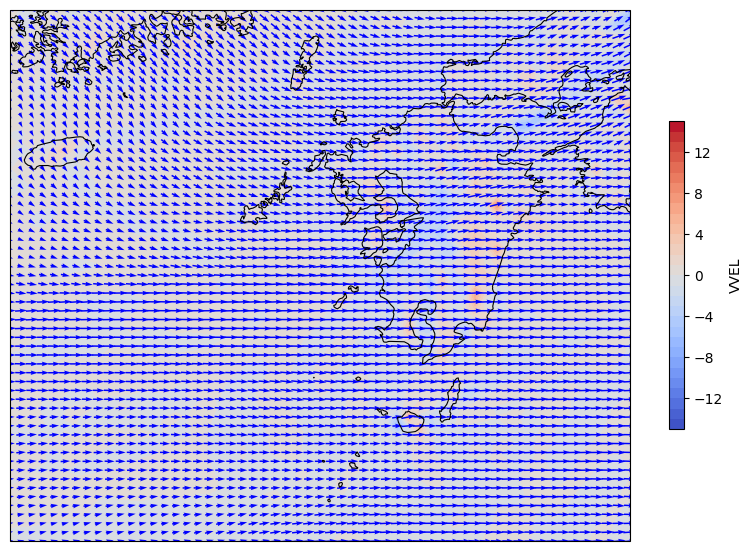

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np

def plot_wind_vectors(date, init_h, forecast_h, pressure_level=850, lat_range=(20, 50), lon_range=(116, 153)):
    # 有効な予報時間のリスト
    valid_forecast_hours = [0, 3, 6, 9, 12, 15]

    # forecast_hourが有効な予報時間リストに含まれているか確認
    if forecast_h not in valid_forecast_hours:
        print(f"Invalid forecast hour: {forecast_h}. Must be one of {valid_forecast_hours}.")
        return
    else:
        # forecast_hourがリストの何番目かを求める
        hour_index = valid_forecast_hours.index(forecast_h)
        print(f"Forecast hour index: {hour_index}")

    # ファイルパスの生成
    file_directory = 'C:/Users/mori/Documents/PythonData/'
    file_name = f'Z__C_RJTD_{date}{init_h:02d}0000_MSM_GPV_Rjp_L-pall_FH00-15_grib2.ncdf'
    data_path = file_directory + file_name

    # データファイルを読み込む
    data = xr.open_dataset(data_path)

    # 指定された気圧面と緯度経度の範囲で風速データを抽出
    u_wind = data[f'UGRD_{pressure_level}mb'].sel(latitude=slice(*lat_range), longitude=slice(*lon_range)).metpy.quantify()
    v_wind = data[f'VGRD_{pressure_level}mb'].sel(latitude=slice(*lat_range), longitude=slice(*lon_range)).metpy.quantify()
    vvel   = data[f'VVEL_{pressure_level}mb'].sel(latitude=slice(*lat_range), longitude=slice(*lon_range)).metpy.quantify()

    # 緯度と経度のデータをスライス
    lons = data['longitude'].sel(longitude=slice(*lon_range))
    lats = data['latitude'].sel(latitude=slice(*lat_range))

    # プロットの設定
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m', linewidth=0.8)

    # VVELの色分けされた等値線図をプロット
    levels = np.linspace(-15, 15, 31)  # -15から15まで1の間隔で
    contourf = ax.contourf(lons, lats, vvel[hour_index,:,:], levels=levels, cmap='coolwarm', transform=ccrs.PlateCarree())
    plt.colorbar(contourf, ax=ax, shrink=0.5, label='VVEL')


    # 風のベクトル図をプロット
    ax.quiver(lons, lats, u_wind[hour_index,:,:], v_wind[hour_index,:,:], pivot='middle', color='blue', scale=800)

    plt.show()

    del data

# 使用例
plot_wind_vectors('20230704', 15, 0, pressure_level=850, lat_range=(29, 35), lon_range=(126, 133))
plot_wind_vectors('20230704', 15, 3, pressure_level=850, lat_range=(29, 35), lon_range=(126, 133))
plot_wind_vectors('20230704', 15, 6, pressure_level=850, lat_range=(29, 35), lon_range=(126, 133))
plot_wind_vectors('20230704', 15, 9, pressure_level=850, lat_range=(29, 35), lon_range=(126, 133))
plot_wind_vectors('20230704', 15,12, pressure_level=850, lat_range=(29, 35), lon_range=(126, 133))
plot_wind_vectors('20230704', 15,15, pressure_level=850, lat_range=(29, 35), lon_range=(126, 133))
